# *Lab #2*
This lab will be focused on using convolution. Convolution can be used to calculate the probability of a sum or average.

In [262]:
## Importing Libraries 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal
from scipy import stats

## Problem 1

- We are looking for gamma-ray sources. 

- However there is a background of cosmic-rays. The background of cosmic-rays creates a discrete noise signal that follows a Poisson distribuiton. 

- To detect our gamma-ray source, we need to find what the probability is that the cosmic-ray background will give a measurement as a signal-like, or more signal-like than the measurement we recieved.

- The average daily cosmic-ray background noise is a number X

- the average daily number of gamma-rays (desired signal) emitted by a source is Y 


The **Poission Distribution** describes the probability of a number of events occuring in a fixed time interval with a known constant mean rate. Each event is independent of the time since the last event. 


**Poisson Probability Mass Function (PMF)**
This is a helpful distribution for looking at how many times an event occurs within a time interval.

$$f(k;\lambda )=\Pr(X=k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

- k = discrete random variable, the number of occurances
- k! = factorial of k
- $\lambda$ = the expected value of k = variance

Note again that with a discrete random variable events occur independently. 

### A) *Show how the probability distribution of the background changes as you integrate (sum) for more days.*

We will set the daily average number of cosmic-ray backgorund noise equal to 3. This is the mean value for the number of cosmic-ray background measurements.

Next we set the daily average number of gamma-ray desired signal measurements equal to 6.

In [263]:
#---- PROBLEM SET UP ----

#daily average cosmic-ray background noise
cosmicRay_dayAvg = 3;

#poisson distribution cosmic-ray background noise data
data_cosmicRay = stats.poisson(cosmicRay_dayAvg);

#discrete random variable, number of occurances of cosmic-rays 
k_cosmicRays = np.arange(0,40);

#pmf of the cosmic ray background, taking a discrete variable 

#pmf of cosmic-ray background
pmf_day1 = data_cosmicRay.pmf(k_cosmicRays);

Below is a funciton that allows you to easily calculate the integrated summed pmf distribution over multiple days. 

In [264]:
#This function takes a pmf distribution, and an integer number of days.
#It outputs the pmf sum over multiple days

def pmf_laterDaySum(pmf_day1, days):
    
    pmf_sum = pmf_day1;
    
    for i in range(days-1):
        pmf_sum = np.convolve(pmf_sum, pmf_day1)
        
    return pmf_sum

Next we will create a series of plots showing the how the probability distribution of the background data changes over time as we integrate over 1 days, 5 days, and 10 days.

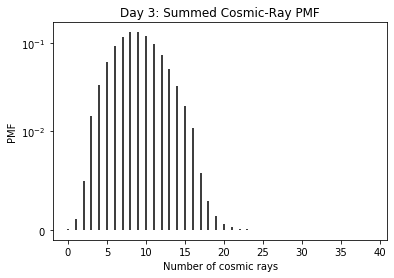

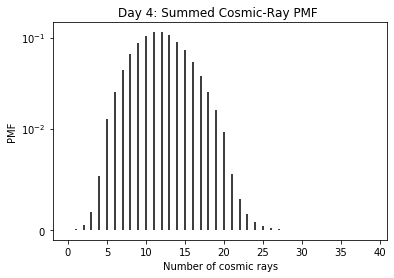

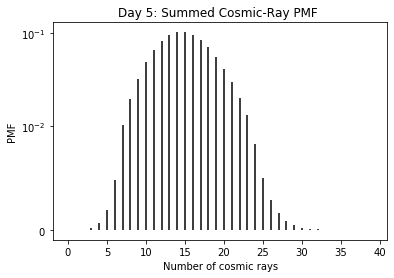

In [265]:
#---- PLOTS ----

#-----PLOT 1: DAY 3------
days = 3
#calculate integrated sum
pmf_sum_day3 = pmf_laterDaySum(pmf_day1, days)

#plot
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k_cosmicRays, 0, pmf_sum_day3)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
#Setting plot title and lables
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 3: Summed Cosmic-Ray PMF')
plt.show()


#-----PLOT 2: DAY 4------
days = 4

pmf_sum_day4 = pmf_laterDaySum(pmf_day1, days)

#plot
fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day4)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 4: Summed Cosmic-Ray PMF ')
plt.show()


#-----PLOT 2: DAY 5------
days = 5
pmf_sum_day5 = pmf_laterDaySum(pmf_day1, days)

fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day5)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 5: Summed Cosmic-Ray PMF ')
plt.show()

The series of plots above shows how the probability distribution changes as you integrate (sum) for more days.

### B) *Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.*

From the equation below, we see that when summing a poisson distribution although the expected value ($\lambda$) changes, the distribution remains a poisson distribution:
$${\displaystyle \sum _{i=1}^{n}\mathrm {Poisson} (\lambda _{i})\sim \mathrm {Poisson} \left(\sum _{i=1}^{n}\lambda _{i}\right)\qquad \lambda _{i}>0}$$

Looking at the *Day 5: Summed Cosmic-Ray PMF* plot above, we see it is visually congruent with the equation above. As time goes on and the number of days increases, we can see in the series of plots above that the distribution follows a Poisson curve with it's slightly extended tail on the right. The expected value ($\lambda$) of the Poisson distribution increases as the number of poisson distributions you are summing over increases. This shifts the distribution to the right. Therefore after 5 days, the summed probability distribution is still a Poisson distribution. 

### C) *Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.*

First we create an averaged probability distribution function

In [266]:
#This function takes a pmf distribution, and an integer number of days.
#It outputs the pmf average over multiple days as the first return value,
#and outputs the re-scaled K (x axis) as the second return value

def pmf_laterDayAvg_andK(pmf_day1, days):
    
    pmf_avg = pmf_day1;
    
    for i in range(days-1):
        pmf_avg = np.convolve(pmf_avg, pmf_day1)
        
    k_cosmicRays = np.arange(len(pmf_avg)) / days;
        
    return pmf_avg, k_cosmicRays;

Next we make a series of multiple plots over different time intervals

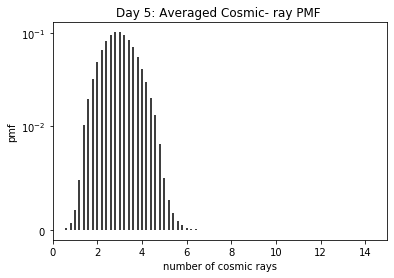

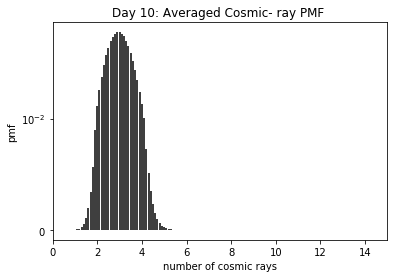

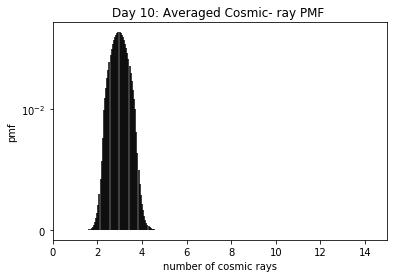

In [267]:
#---- PLOTS ----

#-----PLOT 1: DAY 5------
days = 5;

pmf_avgDay5Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay5 = pmf_avgDay5Params[0];

k5 = pmf_avgDay5Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pmf_avgDay5)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 5: Averaged Cosmic- ray PMF ')
plt.show()


#-----PLOT 2: DAY 10------
days = 10;

pmf_avgDay10Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay10 = pmf_avgDay10Params[0];

k10 = pmf_avgDay10Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k10, 0, pmf_avgDay10)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Cosmic- ray PMF ')
plt.show()


#-----PLOT 3: DAY 20------
days = 20;

pmf_avgDay20Params = pmf_laterDayAvg_andK(pmf_day1, days);

pmf_avgDay20 = pmf_avgDay20Params[0];

k20 = pmf_avgDay20Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k20, 0, pmf_avgDay20)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(0,15);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Cosmic- ray PMF ')
plt.show()


The **Central Limit Theorem** states: when independent random variables are added, their properly normalized sum tends toward a normal distribution. No matter what form the population distribution is, the sampling distribution tends to a Gaussian. 

As we can see in the series of plots above, increasing the number of days  averaged causes the the spread of the distribution to shrink, and it's shape looks more like a normal distribution around the mean expected value. 

Because we are calculating the sample average, we need to re-scale our discrete random variable X (which in our case is K):
$${\displaystyle {\bar {X}}_{n}:={\frac {X_{1}+\cdots +X_{n}}{n}}}$$

In the equation above **n** is the number of times averaged. In our case the number of days averaged.

**In relationship to part B)**, here we have shown that the Poisson distribution is conserved for sums of the Poisson probability distribution, but not for averages of the probabiity distribution. 

Also note how by summing an increasing number of poisson probability distributions distributions over time the mean expected value increased and moved the distribution to the right. However when averaging an increaseing number of poisson probability distributions overtime, because we are averageing and re-scaling the discrete random variable, the mean expected value stays in the same place.

### D) *Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]*

Chosen values:
- Days = $N = 80$

The average daily number of gamma rays emitted is: Y = 6. 

The total number of gamma rays observe over over **N** number of days is: 
- Gamma rays = $Y*N = 6*80 = 480$


After 60 days, we observe a total of 480 gamma rays. 
1. What is the probability that the cosmic-ray background signal looks like a value of 480 or even more signal like than the gamma rays observed? 
2. What is the 'sigma' value of this observation?

In [268]:
#days is our N value 
days = 80

#Daily average cosmic rays
X = 3

#Daily average gamma rays
Y = 6

#creates an array of numbers gamma rays observed
total_gammaRays_obs = np.arange((Y*days))

#The mean value of cosmic-rays = number of days*average daily Cosmic Ray value
cosmicRay_mean = X*days

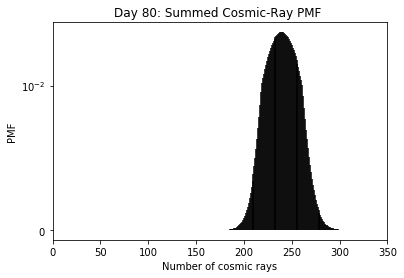

80 day cosmic ray mean =  240


In [269]:
#-----Plot: Day 80 sum of PMF------
k_cosmicRays = np.arange(0,40*60);

pmf_sum_day80 = pmf_laterDaySum(pmf_day1, days)

fig, ax1 = plt.subplots(1,1)

ax1.vlines(k_cosmicRays, 0, pmf_sum_day80)

#Style plot
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
plt.xlim(0,350)
ax1.set_xlabel('Number of cosmic rays', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 80: Summed Cosmic-Ray PMF ')
plt.show()

print('80 day cosmic ray mean = ', cosmicRay_mean)

When looking for the probability that a random variable is above a specific threshold, we need to use the **complementary cumulative distribution function** defined as one minus the CDF:

$$F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt$$

$${\displaystyle {\bar {F}}_{X}(x)=\operatorname {P} (X>x)=1-F_{X}(x).}$$

Once we have the probability value, we plug this value into the **Percent Point function** to find our sigma value.

In [270]:
# Probability that cosmic ray background looks as or more signal like than 
#the gamma rays observed 

cosmicRay_Prob = 1 - stats.poisson.cdf(360, mu=cosmicRay_mean)
print('probability cosmic ray background signal = ', cosmicRay_Prob)

#Plugging the probability into ppf function to find sigma
#Need to do do (1-prob) because it's calculating the inverse of the cdf. 
sigma = stats.norm.ppf(1-cosmicRay_Prob)
print('sigma = ', sigma)

probability cosmic ray background signal =  2.1660451210436804e-13
sigma =  7.244758935588846


With a $7.2\sigma$ value for the cosmic ray background data, it is highly likely that the signal was caused by the background signal.

## Problem 2

Choose a Rayleigh distribution

### A) *Show how the distribution changes as you average over more observing intervals.*

In [271]:
#---- PROBLEM SET UP ----

#daily average cosmic-ray background noise
cosmicRay_dayAvg = 3;

#poisson distribution cosmic-ray background noise data
data_cosmicRay = stats.rayleigh(cosmicRay_dayAvg);

#discrete random variable, number of occurances of cosmic-rays 
k_cosmicRays = np.arange(0,100);

#pmf of the cosmic ray background, taking a discrete variable 

#pmf of cosmic-ray background
pdf_day1 = data_cosmicRay.pdf(k_cosmicRays);

In [272]:
#This function takes a pdf distribution, and an integer number of days.
#It outputs the pdf average over multiple days as the first return value,
#and outputs the re-scaled K (x axis) as the second return value

def pdf_laterDayAvg_andK(pdf_day1, days):
    
    pdf_avg = pdf_day1;
    
    for i in range(days-1):
        pdf_avg = np.convolve(pdf_avg, pdf_day1)
        
    k_cosmicRays = np.arange(len(pdf_avg)) / days;
        
    return pdf_avg, k_cosmicRays;

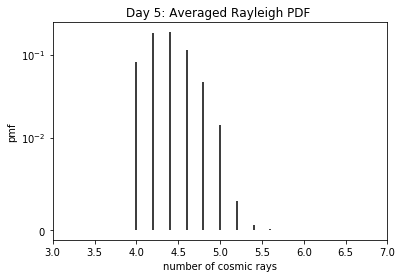

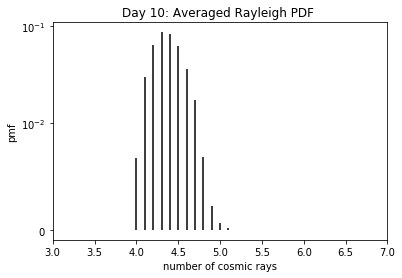

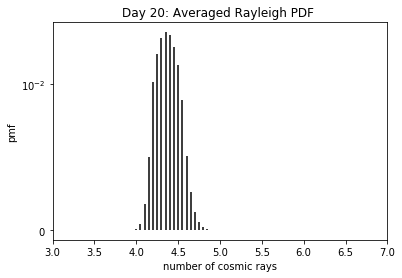

In [273]:
#---- PLOTS ----

#-----PLOT 1: DAY 5------
days = 5;

pdf_avgDay5Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay5 = pdf_avgDay5Params[0];

k5 = pdf_avgDay5Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay5)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(3,7);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 5: Averaged Rayleigh PDF ')
plt.show()


# #-----PLOT 2: DAY 10------
days = 10;

pdf_avgDay10Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay10 = pdf_avgDay10Params[0];

k5 = pdf_avgDay10Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay10)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(3,7);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 10: Averaged Rayleigh PDF ')
plt.show()


# #-----PLOT 3: DAY 20------
days = 20;
pdf_avgDay20Params = pdf_laterDayAvg_andK(pdf_day1, days);

pdf_avgDay20 = pdf_avgDay20Params[0];

k5 = pdf_avgDay20Params[1];

#plots
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k5, 0, pdf_avgDay20)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax1.set_xlim(3,7);

#Setting plot title and lables
ax1.set_xlabel('number of cosmic rays', size = 10)
ax1.set_ylabel('pmf', size = 10)
ax1.set_title('Day 20: Averaged Rayleigh PDF ')
plt.show()


The graphs above show how the Rayleigh distribution changes over time.

### B) *Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?*

The mean of the function shifts to thr right over time, making the distribution slowly approach a gaussian bell curve shape, with an even amount of data points on the right an . You can see that after about 10 days it looks like it is approaching a gaussian distribution. By 20 days it definitely appears gaussian. 

## Problem 3
- We are using an optical telescope with a thermal noise background from the CCD. 
- The background appears as a zero-mean Gaussian with a constant width over the image.

### Version 1
- Looking at a single pixel.
- We measure the width of the background Gaussian distribution **X = 18**.
- See a signal of strength **Y = 17.82**.
- Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

Below, we create the background data with a gaussian distribution, centered with a mean of zero.

Then we plot the Probability Density Function (PDF)

In [274]:
#---- PROBLEM SET UP ----
RealWidth = 18

#realWidth / 6
widthX = 3
signalStrengthY = 17.82

#ackground noise data
#data = stats.norm(scale=(widthX/6))
data = stats.norm(scale=(widthX))


#discrete random variable
x = np.arange(0,25)

#pdf of background signal
pdf_1Pixel = data.pdf(x);

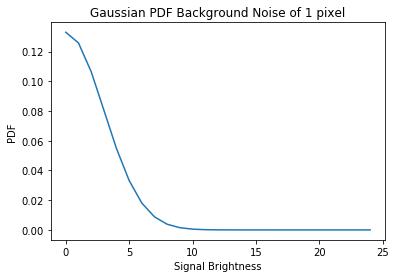

sum of pdf =  0.5664903800669053


In [275]:
#-----PLOT------
fig, ax = plt.subplots(1, 1)
ax.plot(x,pdf_1Pixel)
#ax.set_xlim(0,10);

#Setting plot title and lables
ax.set_xlabel('Signal Brightness', size = 10)
ax.set_ylabel('PDF', size = 10)
ax.set_title('Gaussian PDF Background Noise of 1 pixel')
plt.show()

print('sum of pdf = ', sum(pdf_1Pixel))

Note that in the graph above, it looks like only half of a gaussian. This is because we can not measure "negative" brightness, so we only have positive values. This is why it makes sense that the summed pdf is ~ 0.5

To calculate the probability that the background signal looks as signal like or more signal like than our desired signal (Y=17.82), we use the (1-cdf). This way we are integrating from Y to positive infinity.

In [276]:
probability_1px = 1-data.cdf(signalStrengthY)
print('probability = ', probability_1px)

probability =  1.425110363051374e-09


Next we use the Percent Point Function (PPF) to find the corelating $\sigma$

In [277]:
sigma_1px = stats.norm.ppf(1-probability_1px)
print('sigma = ', sigma_1px)

sigma =  5.940000002363396


The significance of our discovery is $5.94 \sigma$ for the background signal data. This means we have made a genuine discovery because it is greater than $5 \sigma$. 

### Version 2

Now we are not looking at a specific pixel, but a region of the sky.

### B) *If you have to look for a signal in 10k pixels, what is the probability distribution of your background?*

**Statistical Question:** Looking for a signal with 10k pixels, how do we combine the PDF of each individual pixel to find the total bakcground PDF of 10k pixels? 

**Math (using background distribution from version 1):**
Because we know the pdf of 1 pixel from version 1, to find the pdf of 10k pixels we could use convolution like in the first problem, however this takes a very long time to run. We can approximate by multiplying the pdf of 1 pixel by 10k: 
$${\displaystyle \varphi (x)={\frac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}}$$

$${\displaystyle \phi (x)={\frac {10,000}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}} = 10000*\varphi (x)$$

In [278]:
#---- PROBLEM SET UP ----
ten_k = 10000

widthX = 3
signalStrengthY = 17.82

#pdf of background signal multiplied by 10k
pdf_10kPixel = ten_k*data.pdf(x);

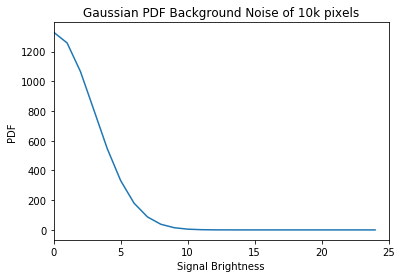

In [279]:
#-----PLOT------
fig, ax = plt.subplots(1, 1)
ax.plot(x,pdf_10kPixel)
ax.set_xlim(0,25);

#Setting plot title and lables
ax.set_xlabel('Signal Brightness', size = 10)
ax.set_ylabel('PDF', size = 10)
ax.set_title('Gaussian PDF Background Noise of 10k pixels')
plt.show()

### C) *Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.*

We calculate the probability in a simillar way as in Version 1. Because the probability distribution for 10k pixels is equivalent to the pdf for 1 pixel multiplied by 10k, we know that the probability follows the same pattern.

For 1 pixel, we calculated the probability that the background signal looks as signal like or more signal like than our desired signal (Y=21.22) by using (1-cdf). This integrates from Y to positive infinity. For 10k pixels, we can just multiply this probability by 10k to find the probability 

In [280]:
probability_10k = 10000*probability_1px
print('probability = ', probability_10k)

probability =  1.425110363051374e-05


To find sigma, use the ppf function just like in Version 1, and plug in the probability above. 

In [281]:
sigma_10k = stats.norm.ppf(1-probability_10k)
print('sigma = ', sigma_10k)

sigma =  4.185114756870744


The significance of our discovery is $4.19 \sigma$. This means we have not made a genuine discovery because the significance is less than than $5 \sigma$. This means that we can not be certian that our background signal is not interfering with our desired signal. In otherwords, there is a chance our background signal likely looks like the desired signal we are looking for.

## Problem 4
This problem looks at the **trials factor (look-elsewhere effect):** When an statistically significant observation may have actually arisen by chance because of the sheer size of the parameter space to be searched for. (source: https://en.wikipedia.org/wiki/Look-elsewhere_effect)

Assume a gaussian background with the same parameters as in problem 3.

### A) *Calculate the signal required for a 5-sigma detection in Version 1*
Version 1: 1 pixel. This question is asking what is the desired signal Y value if you want a 5-sigma dection?

Here we are working backwards: given a sigma value, we want to find a probabiliity, then find the desired Sigma Y value. 

Below we set sigma equal to 5, and input sigma into the sf function. This finds the probability that ...

In [300]:
sigma5 = 5;

probability = stats.norm.sf(sigma5)

print('probability = ', probability)

probability =  2.866515718791933e-07


Now we want to find the desired Sigmal Y value a that coresponds to this probability value.

In [301]:
signalStrengthY = data.isf(probability)

print('signal y value = ', signalStrengthY)

signal y value =  15.000000000000004


Here we have found that the desired signal Y=15. To check that this is true, we plug this signal value into the code to find sigma from Version 1. We expect sigma to be 5.

In [302]:
#Check if right using code from Version 1.:

probability_1px = data.cdf(signalStrengthY)
print('probability = ', probability_1px)

sigma_1px = stats.norm.ppf(1-probability_1px)
print('sigma = ', sigma_1px)


probability =  0.9999997133484281
sigma =  -4.999999999970176


Here the absolute value of sigma is ~ 5. Proving that our signal Y = 15 value is correct.

### B) *Calculate the signal required for a 5-sigma detection in Version 2*
Because we know the distribution for 10k pixels is equivalent to 10k times one pixel:

In [303]:
Y10k = 10000*signalStrengthY
print('signal y for 10k = ', Y10k)

signal y for 10k =  150000.00000000003


### C) *Discuss how much brighter the signal must be for discovery if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.*

If you have a trials factor of 10k, your signal for discovery must also be brighter by a factor of 10k. This would make it near impossible to find a discovery that was not caused by background data, and therefore hinder scientific discovery progress because of the look-elsewhere effect. 

### D) *If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?*
If the trial factor is a small number, say 10, you can find a possible measurement this is because the likely hood that your backgroun

However with a trials factor of 10k, because your desired signal for discovery must also be brighter by a factor of 10k, you will probabably never actually recieve a signal that is 10k times as signal-like or more than your background distribution.  
